Se hace un procedimiento similar que con el analisis anterior, no se explican los pasos

In [15]:
#numpy
import numpy as np

#sklearn
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

#pyclustering
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils import read_sample

#silhouette to evaluate clusterization quality
from pyclustering.cluster.silhouette import silhouette
import dataScienceUtils as ut

#pandas for database usage of data
import pandas as pd

#graphing libraries
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

#define basic info
path='rawDataToFormattedData\\PorCentrosDeSalud\\formattedDataPerformance.txt'

# load list of points for cluster analysis
init_sample = read_sample(path)
number_of_data_points=len(init_sample)
#preprocessing
norm_sample=preprocessing.normalize(np.asarray(init_sample))

def get_random_individual(sample, k):
    return kmeans_plusplus_initializer(sample,k, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

def compute_score(individual,sample):
    kmeans_instance = kmeans(sample,individual)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    dirtyscore = silhouette(sample, clusters).process().get_score()
    score=[x if str(x)!='nan' else 0 for x in dirtyscore]
    return np.mean(np.asarray(score))

def custom_sort(individual):
    return -individual[1]

def cross(individual1,individual2,sample):
    minimum_length=min(len(individual1[0]),len(individual2[0]))
    maximum_length=max(len(individual1[0]),len(individual2[0]))
    new_individual=[]
    for i in range(minimum_length):
        new_individual.append((individual1[0][i]+individual2[0][i])/2)
    for i in range(minimum_length+1,(minimum_length+maximum_length)//2):
        if len(individual1[0])==maximum_length:
            new_individual.append(individual1[0][i])
        else:
            new_individual.append(individual2[0][i])
    return (new_individual,compute_score(new_individual,sample))  

base_individuals=100
number_of_keis=1
number_of_clusters_k=4
lucky_individuals=10
generations=30

poblation=[get_random_individual(norm_sample,k)  for i in range(base_individuals) for k in range(number_of_clusters_k,number_of_keis+number_of_clusters_k)]
poblation=[(x,compute_score(x,norm_sample)) for x in poblation]
poblation.sort(key=custom_sort)

for t in range(30):
    ofspring=[]
    for i,x in enumerate(poblation):
        for j,y in enumerate(poblation):
            if i<j and i<lucky_individuals and j<lucky_individuals:
                ofspring.append(cross(x,y,norm_sample))
    for of in ofspring:
        poblation.append(of)
    poblation.sort(key=custom_sort)
    poblation=poblation[:base_individuals]

kmeans_instance = kmeans(norm_sample,poblation[0][0])
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
print(poblation[0][1])
for clusteri in clusters:
    print(clusteri)

0.4629665700150529
[20, 21]
[18]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
[2]


Se carga la base de datos

In [16]:
csvPath='rawDataToFormattedData\\PorCentrosDeSalud\\pandaDataPerformance.csv'
hospitales=pd.read_csv(csvPath,sep=',')

In [17]:
visual_testing=np.asarray(init_sample);

In [18]:
visual_testing[0].reshape(25,7)

array([[  0.,   5.,  13.,   0.,   4.,  40.,  88.],
       [  8.,  10.,  18.,   1.,  17.,  47.,  49.],
       [109.,   4.,   9.,  25.,   0.,   3.,   0.],
       [  7.,  13.,  10.,   0.,  70.,  35.,  15.],
       [ 35.,  23.,   7.,   4.,  15.,  43.,  23.],
       [  0.,   4.,  11.,   8.,   6.,  36.,  85.],
       [  0.,  14.,  16.,  47.,  14.,  25.,  34.],
       [  1.,   7.,   6., 121.,   2.,   5.,   8.],
       [  0.,   1.,   4.,   1.,   4.,   7., 133.],
       [  0.,   0.,   7.,   0.,   5.,   5., 133.],
       [  1.,   0.,   0.,  23.,   1.,   2., 123.],
       [  1.,   0.,  14.,   1.,  30.,  22.,  82.],
       [  0.,   1.,   5.,   1.,   1.,  12., 130.],
       [  0.,   0.,   5.,   0.,   1.,  13., 131.],
       [  0.,   0.,   4.,   0.,   3.,   8., 135.],
       [  0.,   1.,   3.,   0.,   1.,   8., 137.],
       [ 30.,   4.,  10.,   5.,   1.,   3.,  97.],
       [ 34.,   8.,   8.,   5.,   1.,   0.,  94.],
       [  0.,   0.,   4.,  50.,   1.,   7.,  88.],
       [ 21.,  10.,   6.,  52.,

In [19]:
hospitales[hospitales.ID==0]

,EVA,NU,CN,AV,NE,MV,CS,SI,HOSPITAL,ID
0,Acceso_consulta,0,5,13,0,4,40,88,CSB,0
22,Acceso_programación consulta,8,10,18,1,17,47,49,CSB,0
44,Acceso_fin de semana,109,4,9,25,0,3,0,CSB,0
66,Acceso_tiempo de atención,7,13,10,0,70,35,15,CSB,0
88,Acceso_medicamentos,35,23,7,4,15,43,23,CSB,0
110,Acceso_laboratorio,0,4,11,8,6,36,85,CSB,0
132,Acceso_ especialista,0,14,16,47,14,25,34,CSB,0
154,Acceso_cirugía,1,7,6,121,2,5,8,CSB,0
176,Puerta de entrada_Consulta,0,1,4,1,4,7,133,CSB,0
198,Puerta de entrada_Examenes,0,0,7,0,5,5,133,CSB,0


In [20]:
for clusteri in clusters:
    nombres=[hospitales[hospitales.ID==i].iloc[0]['HOSPITAL'] for i in clusteri]
    print(nombres)

['Hospital LAP', 'Hospital PM']
['Hospital FPS']
['CSB', 'CSBA', 'CSCA', 'CSCAL', 'CSCO', 'CSGU', 'CSME', 'CSMI', 'CSMO', 'CSPR', 'CSQAN', 'CSQCN', 'CSQMD', 'CSSI', 'CSTE', 'CSTO', 'Hospital CAÑ', 'Hospital GUA']
['CSBS']


Una vez obtenidos el agrupamiento, y la base de datos, se investiga sobre las similitudes y las diferencias de los grupos de acuerdo a sus resultados, primero se obtiene una calificacion para las variables intermedio

In [21]:
column1=[]
column2=[]
column3=[]
column4=[]
for index, row in hospitales.iterrows():
    column1.append(row['EVA'])
    column3.append(row['HOSPITAL'])
    column4.append(row['ID'])
    suma=row['NU']+row['CN']+row['AV']+row['NE']+row['MV']+row['CS']+row['SI']
    calificacion=0*row['NU']+row['CN']+2*row['AV']+3*row['NE']+4*row['MV']+5*row['CS']+6*row['SI']
    calificacion=calificacion/suma
    column2.append(calificacion)

basic_data = {'EVA':column1,'CALIFICACION':column2,'HOSPITAL':column3,'ID':column4}
hospitales_calificado = pd.DataFrame (basic_data, columns = ['EVA','CALIFICACION','HOSPITAL','ID'])

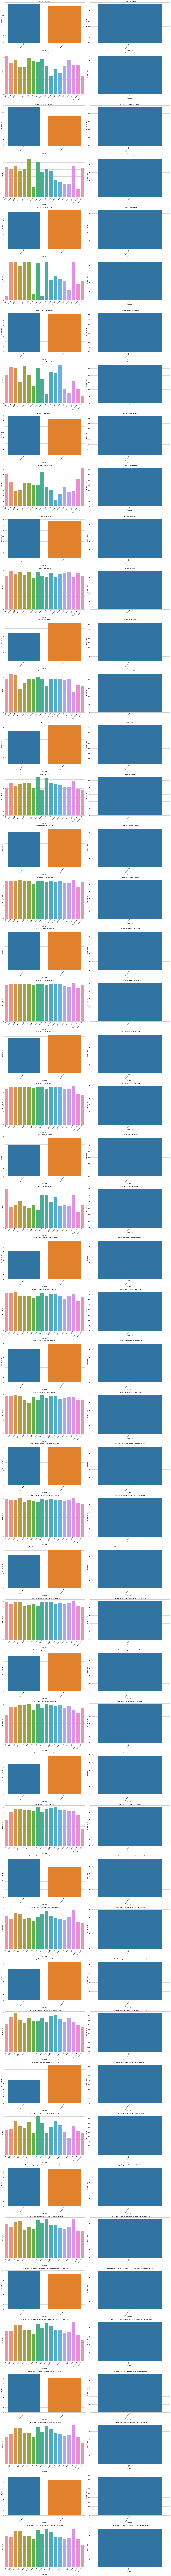

In [51]:
fig = plt.figure(figsize=(20,300))
variable_names=[]
for index,row in hospitales[hospitales.ID==0].iterrows():
    variable_names.append(row['EVA'])
var=1
for EVAName in variable_names:
    for i in range(len(clusters)):
        first=hospitales_calificado[hospitales_calificado['ID'].isin(clusters[i])]
        first=first[first['EVA']==EVAName]
        ax = fig.add_subplot(2*len(variable_names),len(clusters)/2, var) #Defino una tabla de 1 fila1 por 2 columnas, agrego el i-ésimo plot
        ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha="right")
        ax.set_xlabel('')
        graph = sns.barplot(x=first.columns[2], y=first.columns[1], data=first)
        plt.title(EVAName)
        var+=1
fig.tight_layout()

In [52]:
graph=graph.get_figure()
graph.savefig("graficasAnalisisPerformance.pdf", bbox_inches='tight')